In [2]:
from periodicLatticeSolver import PeriodicLatticeSolver
from minimizer import Minimizer
import numpy as np
from FloorPlanClass import FloorPlan
from plotter import Plotter
PLS = PeriodicLatticeSolver(200, .02)
PLS.add_Injector()

L1 = PLS.Variable('L1', varMin=.01, varMax=.5)
L2= PLS.Variable('L2', varMin=.01, varMax=.5)
L3 =PLS.Variable('L3', varMin=.01, varMax=.5)
L4= PLS.Variable('L4', varMin=.01, varMax=.5)

Bp1 = PLS.Variable('Bp1', varMin=1e-2, varMax=.45)
Bp2 = PLS.Variable('Bp2', varMin=1e-2, varMax=.45)
Bp3 = PLS.Variable('Bp3', varMin=1e-2, varMax=.45)
Bp4 = PLS.Variable('Bp4', varMin=1e-2, varMax=.45)

rp1 = PLS.Variable('rp1', varMin=.005, varMax=.02)
rp2 = PLS.Variable('rp2', varMin=.005, varMax=.02)
rp3 = PLS.Variable('rp3', varMin=.005, varMax=.02)
rp4 = PLS.Variable('rp4', varMin=.005, varMax=.02)


L1Space=PLS.mathVariable(rp1,3)
L2Space=PLS.mathVariable(rp2,3)
L3Space=PLS.mathVariable(rp3,3)
L4Space=PLS.mathVariable(rp4,3)

r0=1
TL1=PLS.Variable('TL1',varMin=.5,varMax=1.5)
TL2=PLS.Variable('TL2',varMin=.5,varMax=1.5)


PLS.set_Track_Length(TL1=TL1,TL2=TL2)
PLS.begin_Lattice()

PLS.add_Bend(np.pi, r0, .45)
PLS.add_Drift(L=L4Space)
PLS.add_Lens(L4, Bp4, rp4)
PLS.add_Drift()
PLS.add_Combiner()
PLS.add_Drift()
PLS.add_Lens(L1, Bp1,rp1)
PLS.add_Drift(L=L1Space)
PLS.add_Bend(np.pi, r0, .45)
PLS.add_Drift(L=L2Space)
PLS.add_Lens(L2, Bp2, rp2)
PLS.add_Drift()
PLS.add_Lens(L3, Bp3, rp3)
PLS.add_Drift(L=L3Space)
PLS.end_Lattice()

Lattice model completed


100%|██████████| 100/100 [01:56<00:00,  1.17s/it]


minCost for each thread:  [1.9        1.85726537 1.85528749 1.78033968 1.7195592  1.66094793
 1.80599886 1.67859661 1.82138644 1.72076397 1.687859   1.69115443
 1.68541197 1.67825185 1.70247357 1.62570229 1.81979156 1.62511821
 1.59580898 1.75254229 1.68165734 1.60554694 1.80162209 1.73237155
 1.63577858 1.6815229  1.72041808 1.74199957 1.63942813 1.6148132
 1.66240793 1.5464419 ]


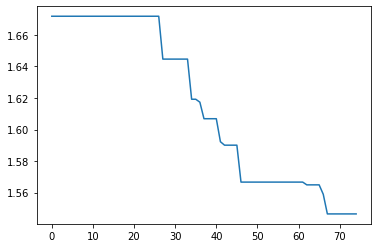

[ 0.5         0.06564129  0.5         0.22657145  0.1         0.1
  0.19778528  0.45        0.03        0.02555802  0.02909624  0.0238668
  1.06250664  1.5         0.2         0.12457666 -0.03993373] 1.5464419006134458
percent particles surviving (x,y): 20.6, 18.3
[ 0.5         0.06564129  0.5         0.22657145  0.1         0.1
  0.19778528  0.45        0.03        0.02555802  0.02909624  0.0238668
  1.06250664  1.5         0.2         0.12457666 -0.03993373] 1.5464419006134458
done
Total time 1 minutes and 59 seconds


In [3]:
minimizer=Minimizer(PLS)
minimizer.find_Global_Min(mut=.75, crossPop=.7, iterations=100, popPerDim=20,strategy='best/1')

In [ ]:
plotter=Plotter(PLS)
plotter.plot(sol=minimizer.sol)

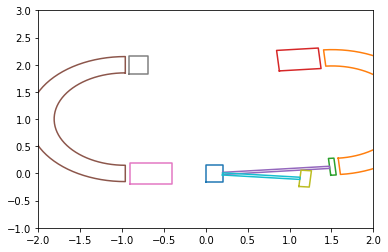

4.0

In [4]:
floorPlan=FloorPlan(PLS)
floorPlan.show_Floor_Plan(sol=minimizer.sol)
floorPlan.calculate_Cost()

In [ ]:
Lo=minimizer.sol.Lo
Lm=minimizer.sol.Lm
s0=minimizer.sol.sOffset
minimizer.PLS.injector.rpFunc(Lo,Lm,0)